<a href="https://colab.research.google.com/github/MwangiAlma/Alma/blob/master/Unsupervised_Learning_Lab_Assgn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Unsupervised learning, scaling, and evaluation tools (from scikit-learn)
from sklearn.preprocessing import StandardScaler  # For data normalization
from sklearn.cluster import KMeans, AgglomerativeClustering  # For K-Means & Hierarchical Clustering
from sklearn.decomposition import PCA  # For dimensionality reduction
from sklearn.manifold import TSNE  # For t-SNE visualization
from sklearn.metrics import silhouette_score  # For evaluating cluster quality

# Hierarchical clustering tools (from scipy)
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch # Import scipy.cluster.hierarchy as sch

# Plotting settings
%matplotlib inline
sns.set(style="whitegrid")

In [ ]:
#Option 2:Uploading the dataset file(Only works if the dataset is downloaded on the device)
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#Option 1:Downloading the dataset from kaggle
import kagglehub
import os

# Download the dataset from Kaggle
dataset_path = kagglehub.dataset_download("shwetabh123/mall-customers")

# Define the CSV file name inside the downloaded folder
csv_file_name = 'Mall_Customers.csv'
file_path = os.path.join(dataset_path, csv_file_name)

# Load the dataset
df = pd.read_csv(file_path)
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Task 1.1:Loading and Exploring the Dataset**

This section focuses on preparing the dataset for unsupervised learning. The goal is to explore the structure of the data, identify any issues (such as missing values), and scale the numerical features to ensure fair comparison across dimensions.

Specifically, this task includes:
*  Loading the Mall Customer Segmentation dataset.
*  Displaying key statistics such as mean, standard deviation, and other summary metrics to understand the distribution of data.
* Checking for missing values and handling them appropriately if found.
* Normalizing the numerical features using StandardScaler to bring them to a similar scale, which is essential for clustering algorithms like K-Means.

---



In [ ]:
#Loading the dataset.
df = pd.read_csv('Mall_Customers.csv')

# Display the first 5 rows of the DataFrame
display(df.head())

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Displaying dataset information
print("\nDataset Info:")
df.info()

# Displaying basic statistics
print("\nDescriptive Statistics:")
df.describe()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Descriptive Statistics:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# Checking for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())



Missing Values in Each Column:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
# Performing Data normalization
numeric_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[numeric_features]

# Applying standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled output back to DataFrame for readability
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_features)

print("\nScaled Features (First 5 Rows):")
X_scaled_df.head()



Scaled Features (First 5 Rows):


,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


### 📊 Task 1.2 – Data Visualization

In this section, we visualize the dataset to better understand the relationships and distribution of key numerical features (`Age`, `Annual Income (k$)`, and `Spending Score (1-100)`).

- **Pair plots** help us explore the pairwise relationships between features and visually identify potential clusters or correlations.
- **Histograms** show the distribution of individual features, allowing us to spot skewness, outliers, and common ranges.

Note: For visualization, we use the **original (unscaled)** values to preserve interpretability.


Pair Plot: Exploring feature relationships


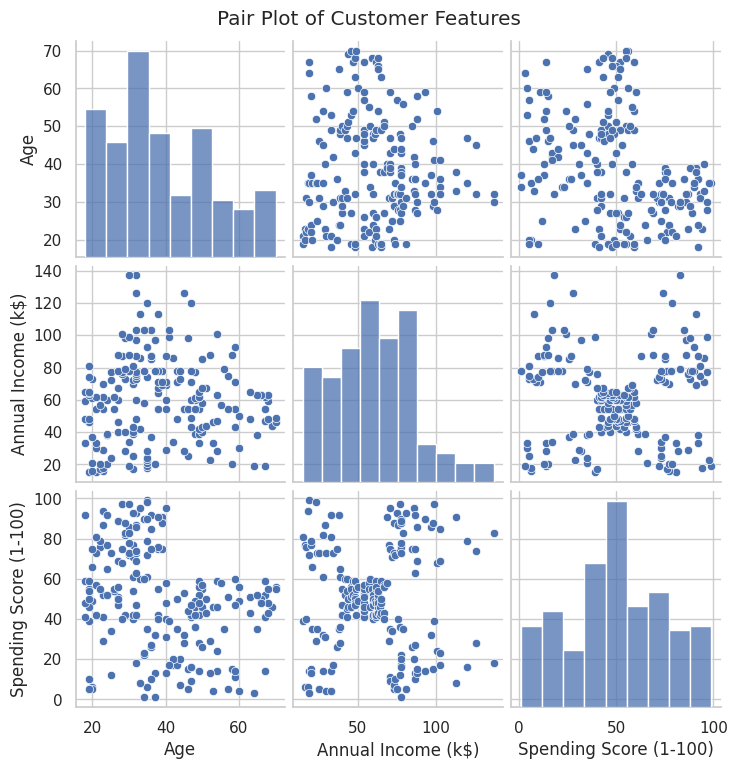

In [ ]:
#Visualizing using pair plots
numeric_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

print("Pair Plot: Exploring feature relationships")
sns.pairplot(df[numeric_features])
plt.suptitle("Pair Plot of Customer Features", y=1.02)
plt.show()


### **Task 1.3: Analysis – What trends or relationships are observable from the pair plots.**
- There is **no strong linear relationship** between `Age`, `Annual Income`, and `Spending Score`, but **distinct clusters begin to emerge** visually.
- **Younger customers (ages 20–40)** show a **wide range of spending scores**, suggesting varied spending behavior — from very low to very high.
- **Older customers (ages 50+)** generally have **lower spending scores**, indicating more conservative purchasing habits.
- The relationship between **Income and Spending Score** is scattered, with **some high-income customers spending less** and **some low-income customers spending more**. This shows that income does **not directly determine** spending behavior.
- **Histograms** show that:
  - Most customers fall in the **age range of 30–40 years**
  - The **income distribution** is fairly even, with a slight concentration around **60–75k**
  - **Spending scores** are balanced, with most customers clustered around the **midpoint (score ≈ 50)**


###  **Task 2 – K-Means Clustering**

In this section, we apply the K-Means clustering algorithm to segment customers based on their purchasing behavior and demographics."

K-Means partitions the data into distinct clusters by minimizing the distance between points and their assigned cluster centers.

#### Steps:
1. **Determining the optimal number of clusters (k)** using the **elbow method** which plots the Within-Cluster-Sum-of-Squares (WCSS) for various values of k and helps identify the point where increasing k yields diminishing returns.
2. **Fit K-Means** to the dataset using the selected k..
3. **Visualizing the resulting clusters** using a 2D scatter plot. Since our data has 3 dimensions (age, income and spending score), we’ll use **PCA** (Principal Component Analysis) to reduce the data to 2D for visualization.
4. **Interpreting the clusters** to understand the characteristics of different customer groups.

This clustering allows us to identify distinct customer segments, which is essential for targeted marketing and customer strategy.


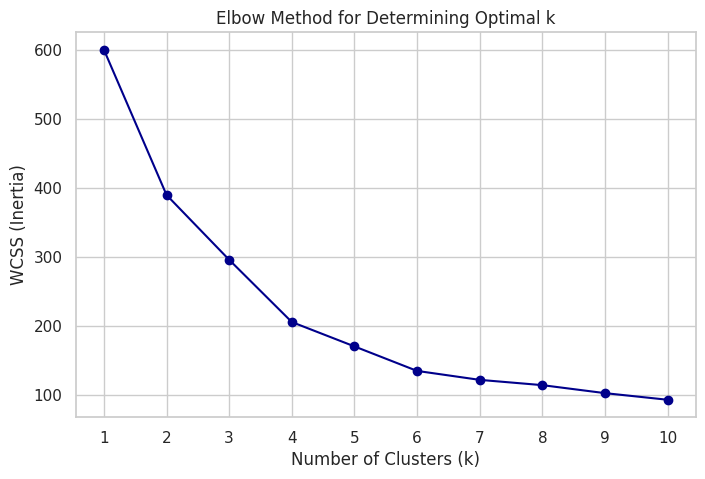

In [ ]:
# Task 2.1:Determining Optimal Number of Clusters (Elbow Method)
wcss = []

# Apply K-Means algorithm for each k and record the WCSS for each
for k in range(1, 11): #The range for our multiple values of K
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='darkblue')
plt.title('Elbow Method for Determining Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()

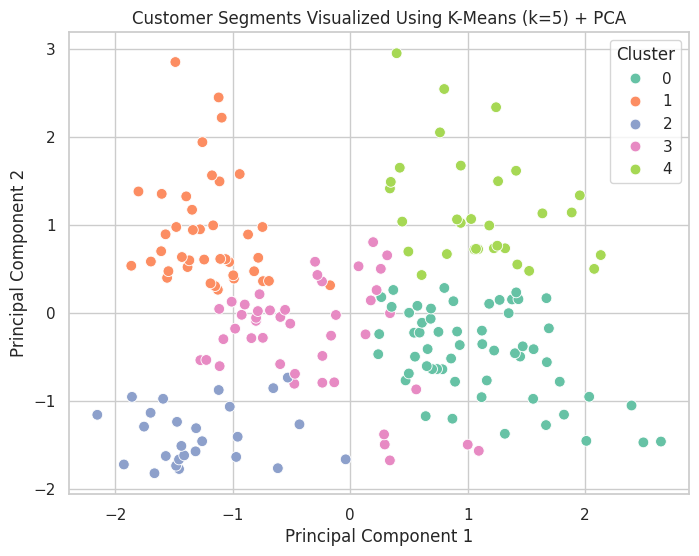

In [ ]:
#Task 2.2
# Reducing the scaled data to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Applying K-means algorithm using k as 5
k = 5  # Optimal number of clusters based on our curve
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Plotting the 2D scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set2', s=60)
plt.title(f'Customer Segments Visualized Using K-Means (k={k}) + PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


#**Task 2.3: Analysis**


*   According to the elbow curve, the optimal number of clusters is 5. At k=5, the decrease in WCSS (Within-Cluster-Sum-of-Squares) starts to slow down, forming an "elbow" shape. Beyond this point, adding more clusters does not significantly reduce the WCSS, suggesting diminishing returns.

**Cluster Interpretation:**

- **Cluster 0** contains older customers (55 years) with mid-level income (47k) and moderate spending score(42). Possibly cautious, routine shoppers.  
- **Cluster 1** includes younger, high-income customers (~86k) who spend the most(82). Likely high-end or luxury-oriented consumers.
- **Cluster 2** consists of very young , low-income customers (~26k) who still spend heavily(75). This cluster likely consists of impulsive buyers.
- **Cluster 3** represents young, middle-income customers (~54k) with average spending behavior(41). Likely working individuals who spend selectively and moderately.
- **Cluster 4** has older, wealthy customers (~90k) who spend the least(18). Likely frugal or selective high earners.




In [ ]:
#Using the average values for each cluster to help identify their characterstics
# Add cluster labels to the original DataFrame
df_clustered = df.copy()
df_clustered['Cluster'] = labels

# Calculate the mean of the original features for each cluster
cluster_means = df_clustered.groupby('Cluster')[numeric_features].mean()

print("\nMean values of features for each cluster:")
display(cluster_means)


Mean values of features for each cluster:


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,55.275862,47.620690,41.706897
1,32.875000,86.100000,81.525000
2,25.769231,26.115385,74.846154
3,26.733333,54.311111,40.911111
4,44.387097,89.774194,18.483871


###  Task 3 – Hierarchical Clustering

In this task, we apply **Hierarchical Clustering**, a bottom-up approach that recursively merges the closest data points into clusters based on their similarity. Unlike K-Means, this method doesn’t require pre-defining the number of clusters.

We will:
- Use **Agglomerative Clustering** with three different linkage strategies: `ward`, `average`, and `complete`
- Generate a **dendrogram** to visualize how data points are grouped hierarchically
- Compare the clustering results to K-Means and analyze which linkage method performs best


In [ ]:
#Task 3.1
# Storing the labels for each linkage method
linkage_methods = ['ward', 'average', 'complete']
cluster_labels = {}

# Using agglomerative clustering for each method
for method in linkage_methods:
    agg_clustering = AgglomerativeClustering(n_clusters=5, linkage=method)
    labels = agg_clustering.fit_predict(X_scaled)
    cluster_labels[method] = labels
    print(f"Linkage: {method} — Cluster counts: {np.bincount(labels)}")


Linkage: ward — Cluster counts: [66 45 39 28 22]
Linkage: average — Cluster counts: [35 52 20 39 54]
Linkage: complete — Cluster counts: [48 35 57 39 21]


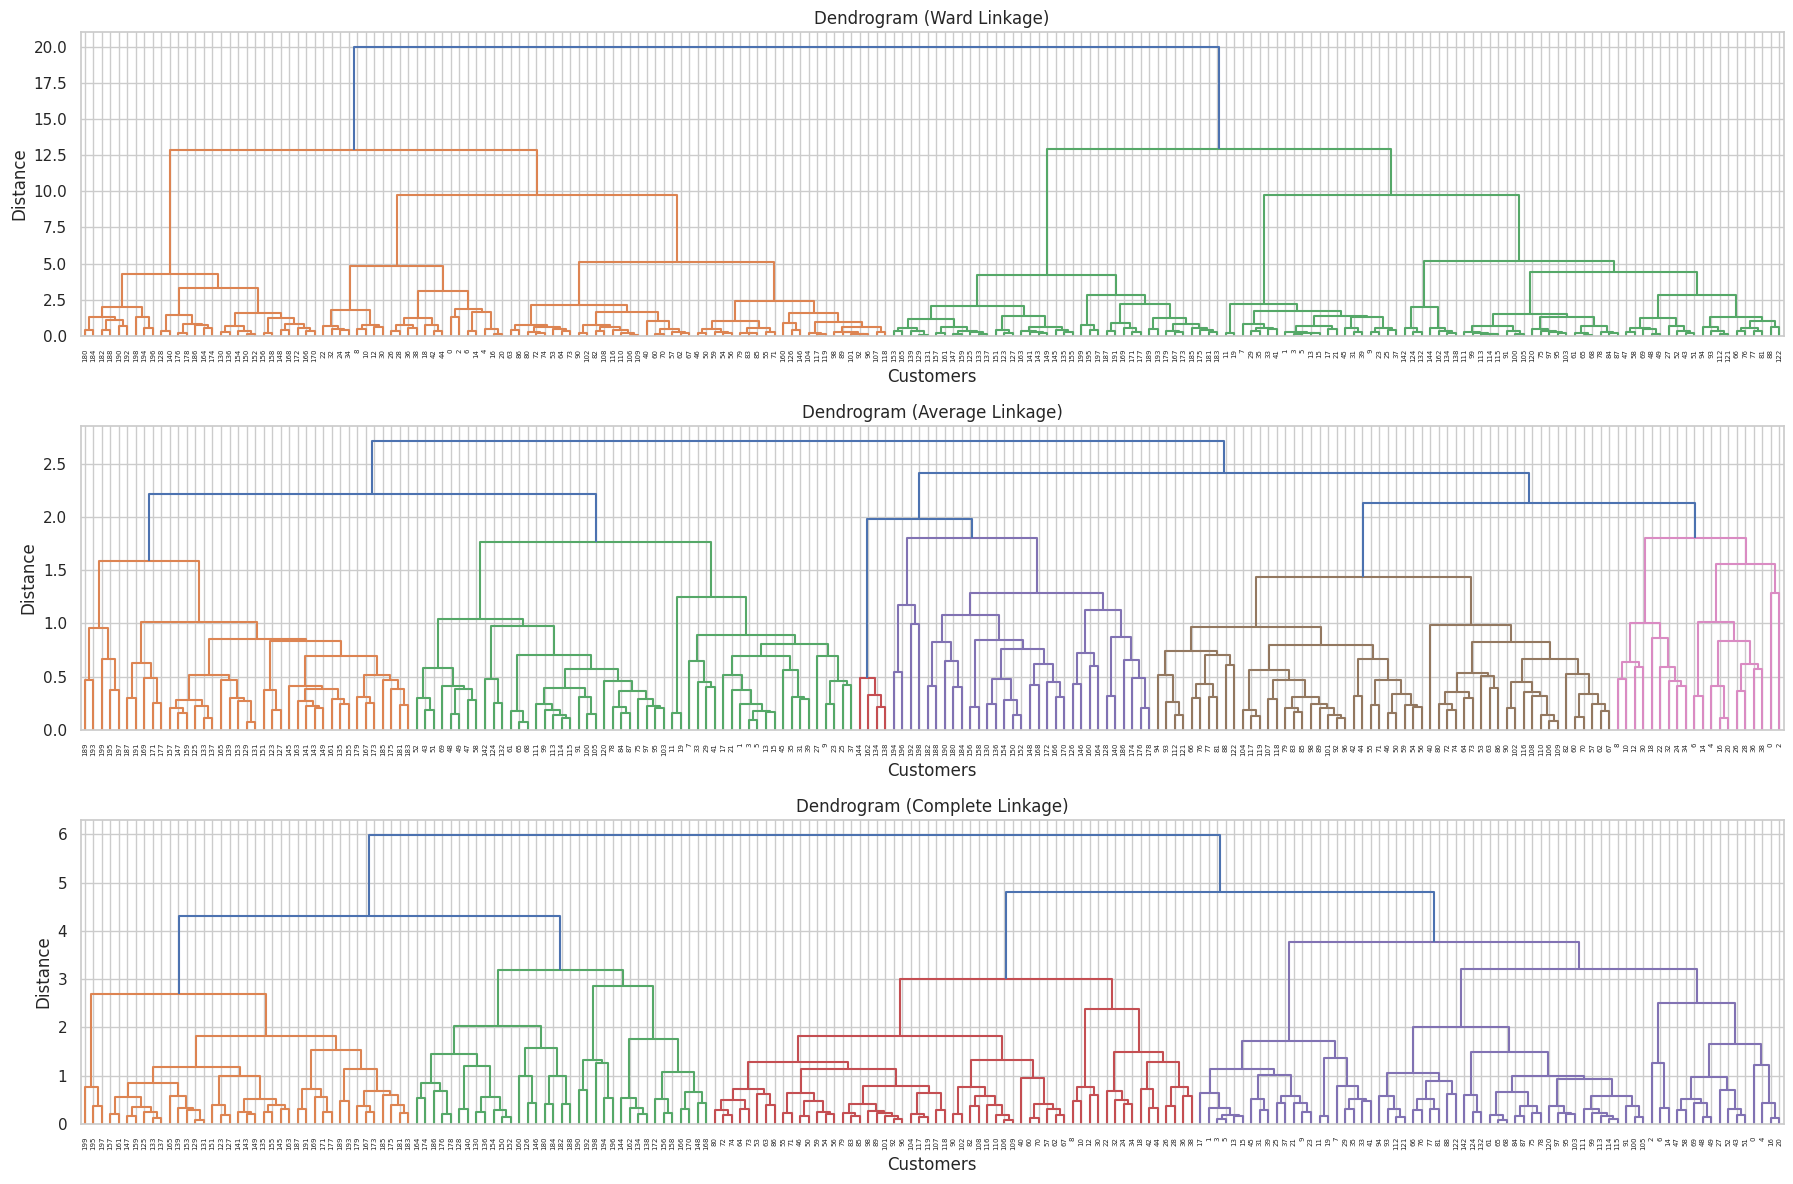

In [ ]:
# Task 3.2 – Generating Dendrograms for Hierarchical Clustering
# Use the linkage function from scipy for hierarchical clustering

linkage_types = ['ward', 'average', 'complete']
plt.figure(figsize=(18, 12))

for i, method in enumerate(linkage_types):
    plt.subplot(3, 1, i + 1)
    linkage_matrix = sch.linkage(X_scaled, method=method)
    sch.dendrogram(linkage_matrix)
    plt.title(f'Dendrogram ({method.capitalize()} Linkage)')
    plt.xlabel('Customers')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()


#**Task 3.3: Analysis**
1) How do the clusters formed using hierachical structuring differ from K-means?
- **K-Means** shows the final 5 distinct, non-overlapping clusters.
- **Hierarchical Clustering** (dendrogram) shows the full merging process, illustrating relationships between points and how clusters form at different levels.
- K-Means emphasizes **cluster separation**, while hierarchical clustering emphasizes **cluster merging and structure**.
- Hierarchical clustering uniquely shows how clusters relate to each other and allows you to choose the number of clusters by cutting the dendrogram at different levels — something K-Means doesn't offer.

2) Which linkage method produces the best results?


*  Ward Linkage: According to the dendrograms above, the ward linkage dendrogram produces more balanced clusters and shows clearer partitions. One can see more distinct main branches that separate at relatively high distances, suggesting well-defined clusters.




### **Task 4 – Dimensionality Reduction Using PCA**

In this task, we apply **Principal Component Analysis (PCA)** to reduce the dimensionality of our dataset. PCA transforms the original features into a smaller set of uncorrelated components that capture most of the data's variance.

By reducing the dataset to 2 dimensions:
- We can visualize high-dimensional data in a 2D space.
- We simplify the structure while preserving as much information as possible.

We'll also:
- Plot the **explained variance ratio** to understand how much information is retained by each component.
- Create a **2D scatter plot** using the first two principal components and **overlay K-Means clusters** to visualize separation more clearly.


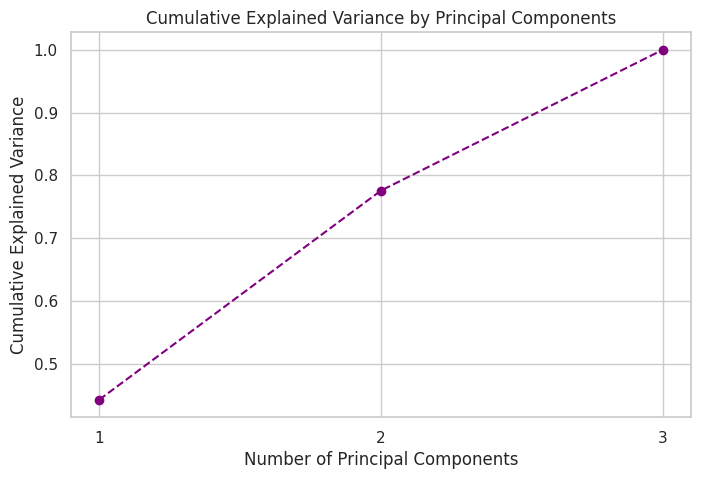

In [ ]:
# Task 4.1 – PCA and Explained Variance Ratio Plot

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Create x and y values explicitly for correct alignment
x_vals = np.arange(1, len(pca.explained_variance_ratio_) + 1)
y_vals = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, marker='o', linestyle='--', color='purple')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.xticks(x_vals)
plt.show()



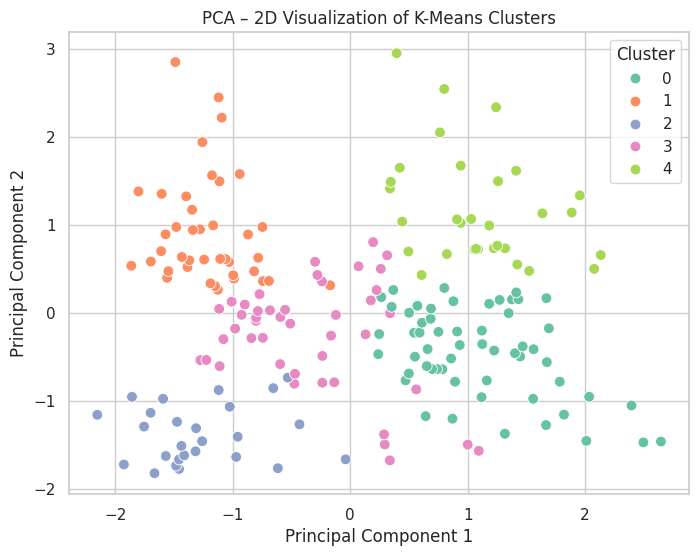

In [ ]:
# Task 4.2 – 2D PCA Scatter Plot with K-Means Cluster Overlay
# Create a DataFrame with the first 2 PCA components and K-Means labels
pca_df = pd.DataFrame(data=X_pca[:, :2], columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans.labels_  # Assuming kmeans is your fitted KMeans model

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=60)
plt.title('PCA – 2D Visualization of K-Means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


### Task 4.3 – Analysis Questions

**1. How much variance is explained by the first two principal components?**  
The first two principal components explain approximately **78% of the total variance** (At x=2, y=0.78) in the dataset. This means that most of the important patterns and structure in the data can be retained using just two dimensions, which is helpful for visualization and further analysis.

**2. How does PCA help in visualizing the clusters?**  
PCA reduces the dataset from three dimensions to two while preserving as much variance (information) as possible. This allows us to create a 2D scatter plot that visually separates the clusters, making it easier to observe how K-Means or Hierarchical clustering groups the data. Without PCA, we wouldn’t be able to clearly visualize the clusters in a flat 2D plot.


### **Task 5 – Dimensionality Reduction using t-SNE**

In this section, we apply **t-distributed Stochastic Neighbor Embedding (t-SNE)**, a nonlinear dimensionality reduction technique that is especially powerful for visualizing high-dimensional data.

While PCA focuses on preserving global structure and variance, **t-SNE is better at capturing local structure** — meaning it reveals small clusters and local relationships between points more clearly.

We will use t-SNE to reduce our 3-dimensional dataset to **2 dimensions**, visualize it in a scatter plot, and compare it with the earlier PCA-based cluster plot.


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


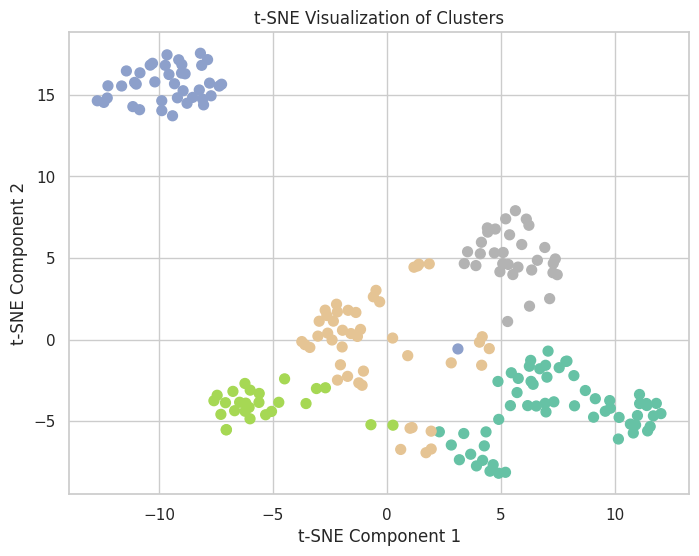

In [ ]:
# Task 5.1 – Apply t-SNE and plot 2D visualization

from sklearn.manifold import TSNE

# Apply t-SNE to reduce to 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot the t-SNE output
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_, cmap='Set2', s=50)
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()


**Task 5.2: Compare the t-SNE visualization with the PCA plot.**

* The t-SNE plot generally provides a more visually striking separation of the clusters compared to the PCA plot. This is because t-SNE prioritizes keeping similar points close together and dissimilar points far apart in the low-dimensional space, which often results in well-defined visual clusters, making it a powerful tool for exploring the relationships between data points within and between clusters.

##**Task 5.3: Analysis**
1) How does t-SNE differ from PCA in terms of visualization and cluster separation?
- **PCA** clusters appear more spread out and may slightly overlap due to its focus on capturing overall variance and linear relationships.

- **t-SNE** clusters are more compact and clearly separated, as it preserves local neighborhood structures, making cluster boundaries easier to see.

2) Which dimensionality reduction technique gives a clearer cluster separation?

* **t-SNE** provides a clearer cluster separation compared to PCA. It produces tighter, more distinct groups by preserving local relationships in the data, making it easier to visually distinguish between customer segments.


### Bonus Task: Evaluating Clustering Quality Using Silhouette Score

The **Silhouette Score** measures how well each data point fits within its assigned cluster compared to other clusters.  
It ranges from **-1 to 1**:
- Values near **+1** mean the point is well matched to its cluster and poorly matched to neighboring clusters.
- A value near **0** indicates overlapping clusters.
- Negative values indicate points might be in the wrong cluster.

We’ll calculate and compare the Silhouette Scores for both **K-Means** and **Hierarchical (Agglomerative)** clustering.


In [ ]:
# Silhouette Score for K-Means
kmeans_silhouette = silhouette_score(X_scaled, kmeans.labels_)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")

# Fit Agglomerative Clustering (same number of clusters as KMeans)
agglo = AgglomerativeClustering(n_clusters=5, linkage='ward')
agglo_labels = agglo.fit_predict(X_scaled)

# Silhouette Score for Hierarchical Clustering
agglo_silhouette = silhouette_score(X_scaled, agglo_labels)
print(f"Hierarchical (Agglomerative) Clustering Silhouette Score: {agglo_silhouette:.4f}")


K-Means Silhouette Score: 0.4085
Hierarchical (Agglomerative) Clustering Silhouette Score: 0.3900


### Interpretation

- **K-Means Silhouette Score**: 0.4085  
- **Hierarchical (Agglomerative) Clustering Silhouette Score**: 0.3900

The K-Means clustering algorithm produced a slightly higher silhouette score, indicating better-defined and more cohesive clusters compared to hierarchical clustering.  
While both methods performed reasonably well, **K-Means offered slightly better separation between customer segments** based on the available features.
